In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [176]:
data = pd.read_csv("mushrooms.csv")

In [177]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [178]:
values = {"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2 = {"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3 = {"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4 = {"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5 = {"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6 = {"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7 = {"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8 = {"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9 = {"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10 = {"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"?"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11 = {"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12 = {"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type = {"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

In [179]:
df = data
df.iloc[0,:]

class                               p
cap-shape                      convex
cap-surface                    smooth
cap-color                       brown
bruises                       bruises
odor                          pungent
gill-attachment                  free
gill-spacing                    close
gill-size                      narrow
gill-color                      black
stalk-shape                 enlarging
stalk-root                      equal
stalk-surface-above-ring       smooth
stalk-surface-below-ring       smooth
stalk-color-above-ring          white
stalk-color-below-ring          white
veil-type                     partial
veil-color                      white
ring-number                       one
ring-type                     pendant
spore-print-color               black
population                  scattered
habitat                         urban
Name: 0, dtype: object

# Exploring Data
---

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [181]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### There is no Null values

In [182]:
# I noticed that in the satlk_root feature there is an unknown value ("?") keeps showing
df['stalk-root'].value_counts()

bulbous    3776
?          2480
equal      1120
club        556
rooted      192
Name: stalk-root, dtype: int64

#### since a lot of records take this value it's better that we keep it (there exists some situations when we don't know the root of the plant) 

In [183]:
#it seems that the column "veil-type" has only one value so dropping it won't affect our work
print(df['veil-type'].value_counts())
df.drop('veil-type',axis = 1, inplace=True)

partial    8124
Name: veil-type, dtype: int64


### In order to get acurate results and acurate measures for acuurcy we have to check for imbalance in the dataset

e    4208
p    3916
Name: class, dtype: int64


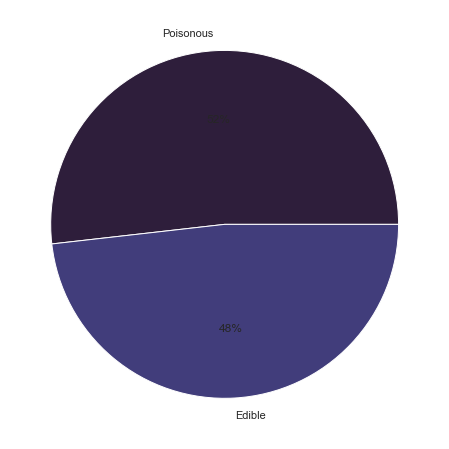

In [184]:
# to get the percentage of each label of the class
classLabelsCounts = df["class"].value_counts()
print(classLabelsCounts)

colors = sns.color_palette('mako')
plt.figure(figsize=(8, 8))
plt.pie(classLabelsCounts , labels = ["Poisonous", "Edible"], colors = colors, autopct = "%.0f%%")
plt.show()

#### We don't need to use oversampling to handle imbalance , the data is well balanced

# EDA
---

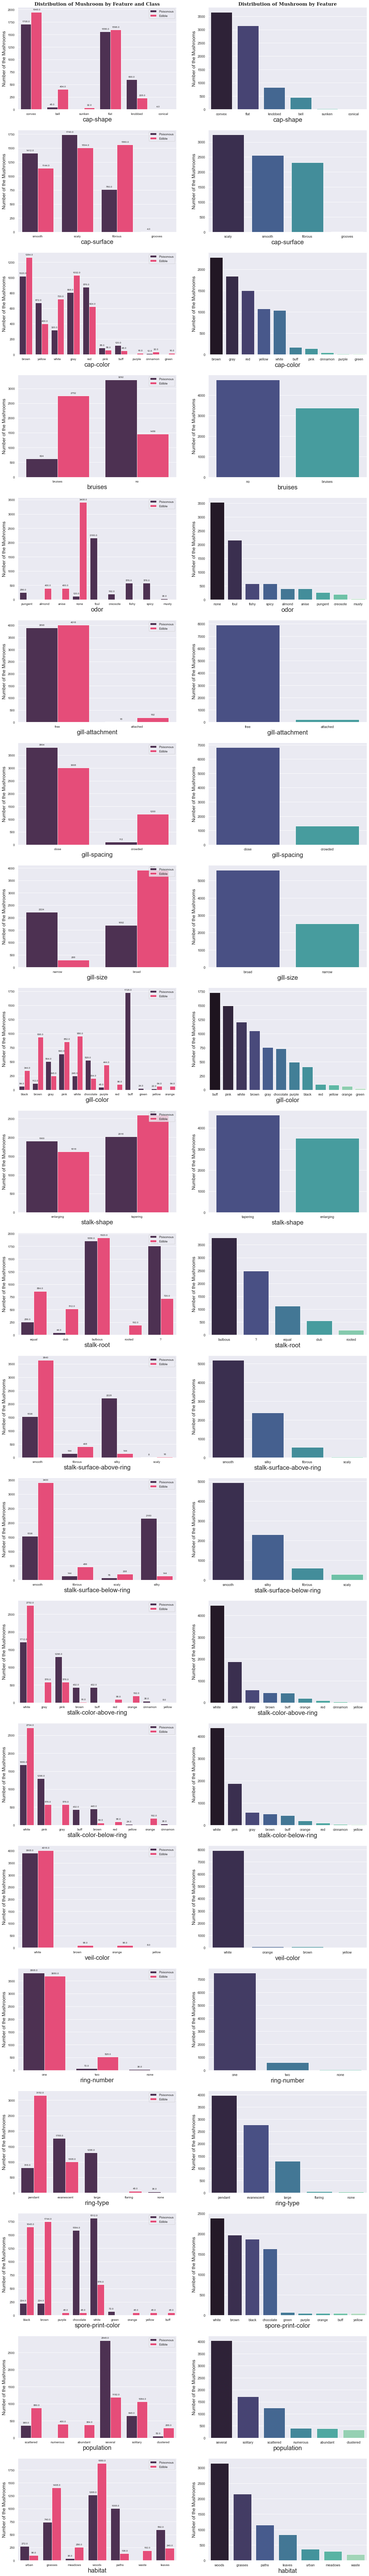

In [185]:
sns.set()
featuresCount = len(df.columns) - 1
f, axes = plt.subplots(featuresCount ,2, figsize=(20,150), sharey = False) 
k = 1

axes[0][0].set_title('Distribution of Mushroom by Feature and Class',fontsize=15,fontfamily='serif',fontweight='bold')    
axes[0][1].set_title('Distribution of Mushroom by Feature',fontsize=15,fontfamily='serif',fontweight='bold')

for i in range(0,featuresCount):
    s = sns.countplot(x = df.columns[k], data = df, hue = 'class', ax=axes[i][0], palette = ['#512b58','#fe346e'])
    axes[i][0].set_xlabel(df.columns[k], fontsize=20)
    axes[i][0].set_ylabel('Number of the Mushrooms', fontsize=15)
    axes[i][0].tick_params(labelsize=10)
    axes[i][0].legend(['Poisonous', 'Edible'], loc='upper right', prop={'size': 10})
    
    for p in s.patches:
        s.annotate(format(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 8,
        textcoords = 'offset points')
    
    
    sns.countplot(x=df.columns[k],
             data=df,
             ax=axes[i][1],
             palette="mako",
             order=df[df.columns[k]].value_counts().index
             )
    axes[i][1].set_ylabel('Number of the Mushrooms', fontsize=15)
    axes[i][1].set_xlabel(df.columns[k], fontsize=20)

    
    k = k+1

# Data Preprocessing
---

In [186]:
# label encoding
mappings = dict()

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])
    mappings_dict = {index: label for index, label in enumerate(le.classes_)}
    mappings[column] = mappings_dict

In [197]:
for col in mappings.keys():
    print(f"{col} --> {mappings[col]}")
    print("--------------------------------------------------------")

class --> {0: 'e', 1: 'p'}
--------------------------------------------------------
cap-shape --> {0: 'bell', 1: 'conical', 2: 'convex', 3: 'flat', 4: 'knobbed', 5: 'sunken'}
--------------------------------------------------------
cap-surface --> {0: 'fibrous', 1: 'grooves', 2: 'scaly', 3: 'smooth'}
--------------------------------------------------------
cap-color --> {0: 'brown', 1: 'buff', 2: 'cinnamon', 3: 'gray', 4: 'green', 5: 'pink', 6: 'purple', 7: 'red', 8: 'white', 9: 'yellow'}
--------------------------------------------------------
bruises --> {0: 'bruises', 1: 'no'}
--------------------------------------------------------
odor --> {0: 'almond', 1: 'anise', 2: 'creosote', 3: 'fishy', 4: 'foul', 5: 'musty', 6: 'none', 7: 'pungent', 8: 'spicy'}
--------------------------------------------------------
gill-attachment --> {0: 'attached', 1: 'free'}
--------------------------------------------------------
gill-spacing --> {0: 'close', 1: 'crowded'}
-----------------------------

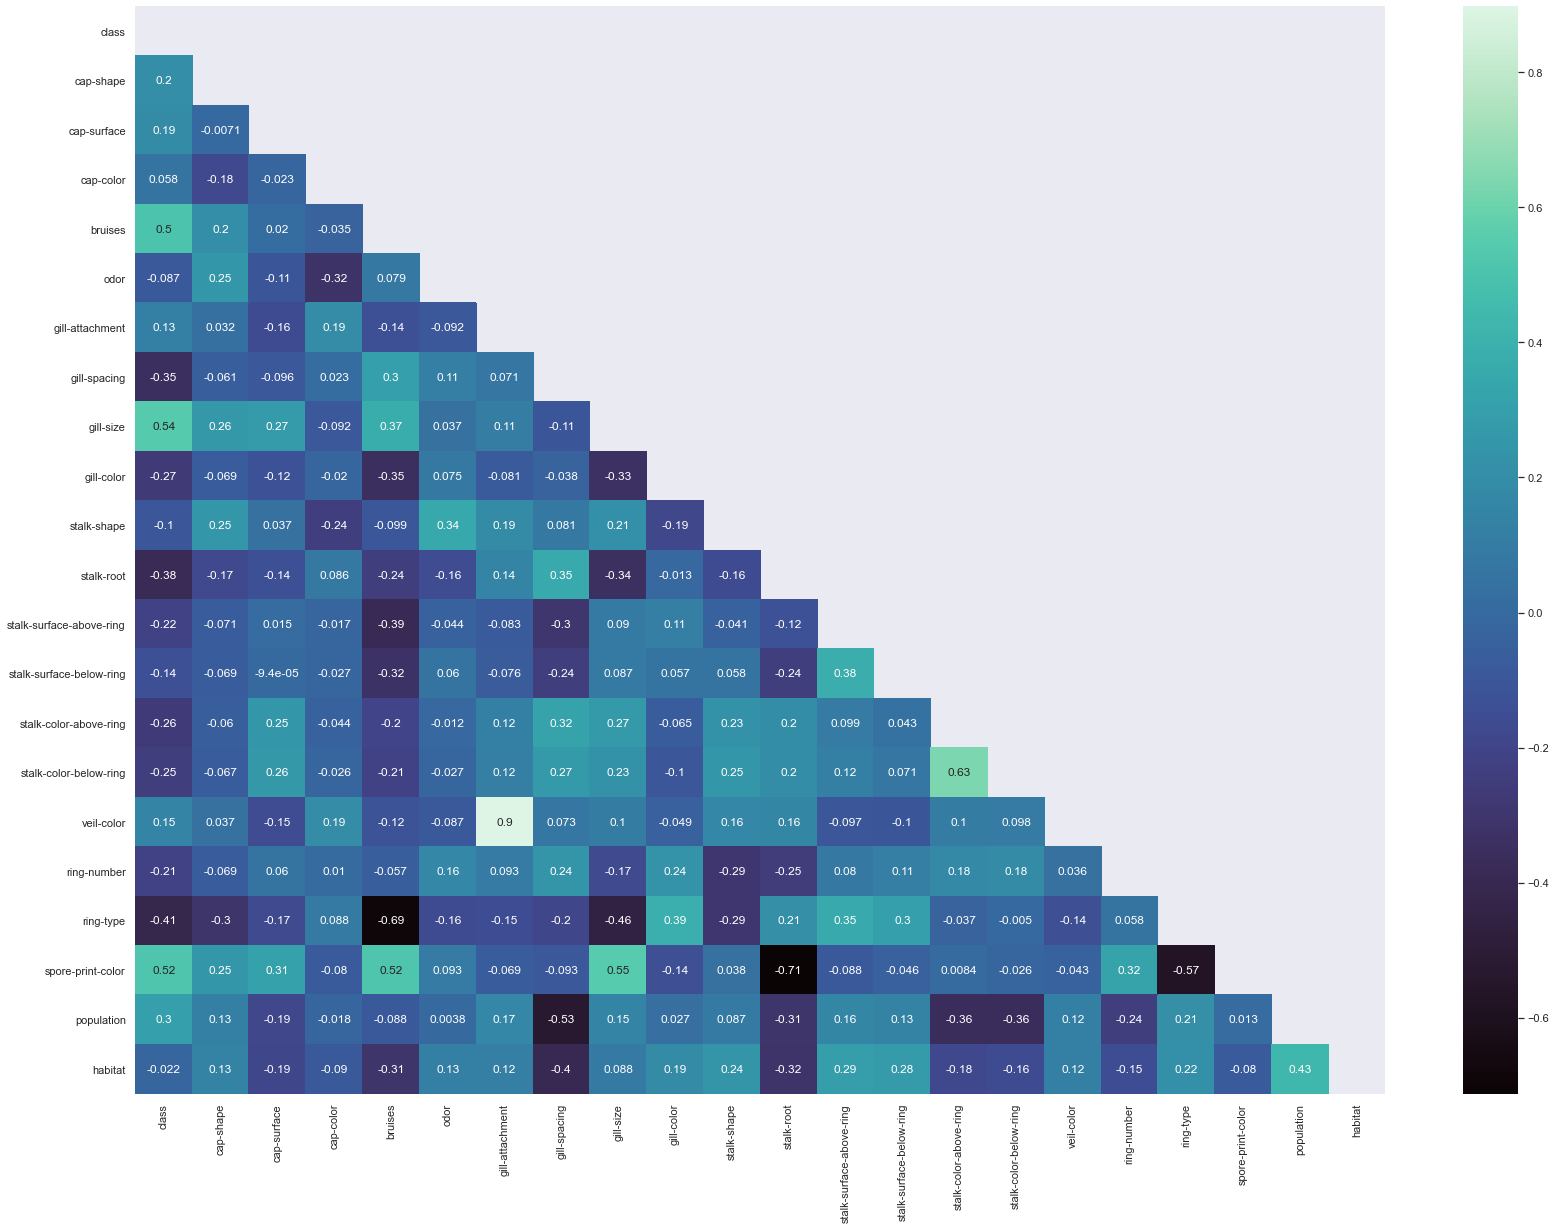

In [195]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(28, 20))
sns.heatmap(df.corr(),annot=True, mask = mask, cmap = "mako")
plt.show()

### From the correlation heat map we can see that there is no dominanting feature and pretty much all the features correlate to the debendent variable "class"

In [189]:
# scaling the features and splitting the data
X = df.iloc[:,1:]
y = df.iloc[:,0]


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=77)

In [99]:
X_scaled.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,-0.545782,1.065669,-1.255302,-1.185917,1.115027,0.162896,-0.438864,1.494683,-1.415071,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-1.083856,-0.514389,0.307811
1,-0.545782,1.065669,1.357802,-1.185917,-2.413988,0.162896,-0.438864,-0.669038,-1.415071,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-0.729891,-1.313108,-1.272882
2,-2.764967,1.065669,1.067457,-1.185917,-1.909843,0.162896,-0.438864,-0.669038,-1.115866,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-0.729891,-1.313108,-0.482535
3,-0.545782,0.217892,1.067457,-1.185917,1.115027,0.162896,-0.438864,1.494683,-1.115866,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-1.083856,-0.514389,0.307811
4,-0.545782,1.065669,-0.384267,0.843230,0.610882,0.162896,2.278612,-0.669038,-1.415071,0.873511,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,-1.272216,-0.729891,-2.910546,-1.272882


In [100]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

# Training the models
---

In [101]:
log_model = LogisticRegression(max_iter=50000)
svm_model = SVC(kernel='rbf')
knn_model = KNeighborsClassifier()

In [102]:
# cross validation phase with 10 folds to select the best model
result_knn = cross_validate(knn_model,Xtrain,Ytrain,cv = 10)
result_log = cross_validate(log_model, Xtrain,Ytrain,cv = 10)
result_svm = cross_validate(svm_model, Xtrain,Ytrain,cv = 10)


In [103]:
model_results = [("Logistic Regression",result_log),("Support Vector Machine",result_svm),("KNN",result_knn)]

for name, res in model_results:
    print(f"{name} avg training time: {round(res['fit_time'].sum() / len(res['fit_time']) * 1000,1)} ms",)
    print(f"{name} avg testing time: {round(res['score_time'].sum() / len(res['score_time']) * 1000,1)} ms",)
    print(f"{name} avg teseting score: {res['test_score'].sum() / len(res['test_score']) * 100}%",)
    print (30*"-")
    

Logistic Regression avg training time: 23.0 ms
Logistic Regression avg testing time: 1.4 ms
Logistic Regression avg teseting score: 94.96832997510964%
------------------------------
Support Vector Machine avg training time: 123.8 ms
Support Vector Machine avg testing time: 22.9 ms
Support Vector Machine avg teseting score: 100.0%
------------------------------
KNN avg training time: 2.5 ms
KNN avg testing time: 81.5 ms
KNN avg teseting score: 99.98461538461537%
------------------------------


In [104]:
log_model.fit(Xtrain,Ytrain)
svm_model.fit(Xtrain, Ytrain)
knn_model.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [105]:
Ypred_log = log_model.predict(Xtest)
Ypred_svm = svm_model.predict(Xtest)
Ypred_knn = knn_model.predict(Xtest)

In [106]:
print("Classification report (Logistic Regression)")
print(classification_report(Ytest,Ypred_log))
print("-------------------------------------")
print("Classification report (SVM)")
print(classification_report(Ytest,Ypred_svm))
print("-------------------------------------")
print("Classification report (KNN)")
print(classification_report(Ytest,Ypred_knn))

Classification report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       868
           1       0.95      0.94      0.95       757

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

-------------------------------------
Classification report (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       757

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

-------------------------------------
Classification report (KNN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       757

    ac

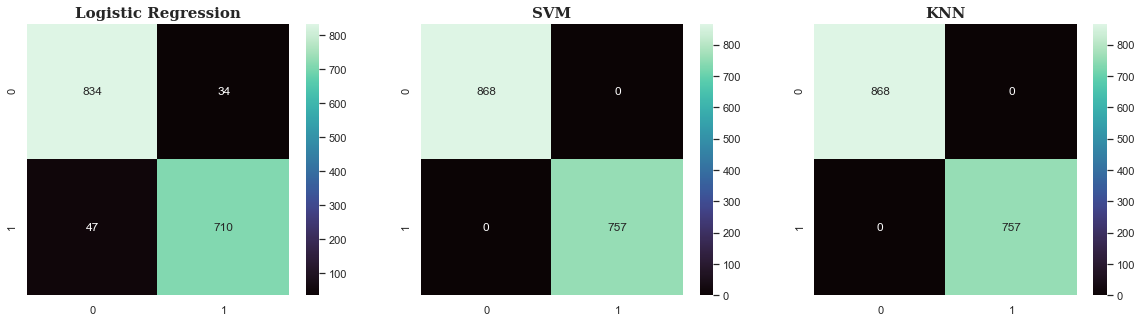

In [107]:

f, axes = plt.subplots(1 ,3, figsize=(20,5))
cf_matrix = confusion_matrix(Ytest, Ypred_log)
sns.heatmap(cf_matrix,ax = axes[0], annot=True, fmt="1", cmap ="mako");
axes[0].set_title('Logistic Regression',fontsize=15,fontfamily='serif',fontweight='bold')  

cf_matrix = confusion_matrix(Ytest, Ypred_svm)
sns.heatmap(cf_matrix,ax = axes[1], annot=True, fmt="1", cmap ="mako");
axes[1].set_title('SVM',fontsize=15,fontfamily='serif',fontweight='bold') 

cf_matrix = confusion_matrix(Ytest, Ypred_knn)
sns.heatmap(cf_matrix,ax = axes[2], annot=True, fmt="1", cmap ="mako");
axes[2].set_title('KNN',fontsize=15,fontfamily='serif',fontweight='bold');

#### We can see from the classification report and the training score that there is no overfitting in any of the three models 

In [108]:
kbest = SelectKBest(score_func=chi2,k=5)
kbest.fit(df.drop('class',axis=1) ,df['class'])
scores = pd.DataFrame(kbest.scores_)
columns = pd.DataFrame(df.drop('class',axis=1).columns)
KbestScores = pd.concat([columns,scores],axis=1)
KbestScores.columns = ['Attribute','Score']
KbestScores.sort_values(by='Score',ascending=False)

,Attribute,Score
18,spore-print-color,5713.529406
17,ring-type,1950.610146
7,gill-size,1636.606833
8,gill-color,1401.345160
10,stalk-root,1186.029221
3,bruises,849.174461
6,gill-spacing,826.795274
13,stalk-color-above-ring,477.500664
14,stalk-color-below-ring,436.232423
19,population,311.766736


In [109]:
columns = pd.DataFrame(df.drop('class',axis=1).columns)
KbestScores = pd.concat([columns,scores],axis=1)
KbestScores.columns = ['Attribute','Score']
KbestScores.sort_values(by='Score',ascending=False,inplace=True)

In [110]:
X_Kbest = df.loc[:,KbestScores["Attribute"][:10]]
X_trainK,X_testK,Y_trainK,Y_testK = train_test_split(X_Kbest, y)

svm_model_Kbest = SVC(kernel='rbf')

In [111]:
svm_model_Kbest.fit(X_trainK, Y_trainK)

SVC()

In [140]:
Y_predK = svm_model_Kbest.predict(X_testK)
# svm_model_Kbest.n_features_
print(classification_report(Y_testK,Y_predK))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1047
           1       0.94      0.99      0.96       984

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.97      0.96      0.96      2031



In [158]:
KbestScores["Attribute"][:10]
svm_model_Kbest.predict(pd.DataFrame(dict(X.loc[2,KbestScores["Attribute"][:10]]), index=[0]))

array([0])

In [53]:
pickle.dump(svm_model_Kbest, open("model.pkl", 'wb'))

In [141]:
KbestScores["Attribute"][:10]

18         spore-print-color
17                 ring-type
7                  gill-size
8                 gill-color
10                stalk-root
3                    bruises
6               gill-spacing
13    stalk-color-above-ring
14    stalk-color-below-ring
19                population
Name: Attribute, dtype: object

In [147]:
dict(X.loc[0,KbestScores["Attribute"][:10]])

{'spore-print-color': 0,
 'ring-type': 4,
 'gill-size': 1,
 'gill-color': 0,
 'stalk-root': 3,
 'bruises': 0,
 'gill-spacing': 0,
 'stalk-color-above-ring': 7,
 'stalk-color-below-ring': 7,
 'population': 3}

In [159]:
dict(X.loc[2,KbestScores["Attribute"][:10]])

{'spore-print-color': 1,
 'ring-type': 4,
 'gill-size': 0,
 'gill-color': 1,
 'stalk-root': 2,
 'bruises': 0,
 'gill-spacing': 0,
 'stalk-color-above-ring': 7,
 'stalk-color-below-ring': 7,
 'population': 2}